<a href="https://colab.research.google.com/github/nicklausmillican/ISLP_Python/blob/main/ISLP_Python_Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4

## Conceptual

### Question 1
Using a little bit of algebra, prove that (4.2)
$$p(X) = \frac{e^{X\beta}}{1 + e^{X\beta}}$$
is equivalent to (4.3).
$$\frac{p(X)}{1-p(X)} = e^{X\beta}$$

(NOTE: The book uses slightly different exponents, $\beta_0 + \beta_1 X$, but use this abbreviated version for ease.)

In other words, the logistic function representation and logit representation for the logistic regression model are equivalent.

#### Answer
Let's start with the definition of odds.  For ease, I'll use $p$ instead of $p(X)$.

$$odds = \frac{p}{1-p}$$

The logistic function is the *log odds*, which is equal to our linear model.

$$log odds = log(\frac{p}{1-p}) = X\beta$$.

We can retrieve equation (4.3) by exponentiating both sides

$$e^{log(\frac{p}{1-p})} = \frac{p}{1-p} = e^{X\beta}$$

Now we must solve for $p$ to get equation (4.2).

$$p = e^{X\beta}(1-p) = e^{X\beta} - pe^{X\beta} \rightarrow$$

$$p + pe^{X\beta} = p(1 + X\beta) \rightarrow$$

$$p = \frac{e^{X\beta}}{1 + e^{X\beta}}$$



### Question 2
It was stated in the text that classifying an observation to the class for which (4.17)

$$p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2 \pi \sigma}} exp(-\frac{1}{2 \sigma^2}(x-\mu_k)^2)}{\sum_{l=1}^K \pi_l \frac{1}{\sqrt{2 \pi \sigma}} exp(-\frac{1}{2 \sigma^2}(x-\mu_l)^2)}$$

is largest is equivalent to classifying an observation to the class for which (4.18)

$$\delta_k(x) = x \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} + log(\pi_k)$$

is largest. Prove that this is the case. In other words, under the assumption that the observations in the kth class are drawn from a $N(µ_k, σ^2)$ distribution, the Bayes classifier assigns an observation to the class for which the discriminant function is maximized.

#### Answer
The way I'm going to do this is to show that $\delta_k$ is proportional to the log of the numerator of Bayes' Theorem (when the likelihood is a normal distribution).  Since a log a monotonic transformation, the max of the log-transformed variable corresponds to the max of the untransformed variable.  In Bayes', the value $k$ that gives the largest numerator is the most probable; the denominator cancels out since every expression across all $K$ values uses the same denominator.  Thus, the greatest $\delta_k$ corresponds to most probable value.

Let's start by simplifying the notation.

$$p_k(x) = \frac{\pi_k \times f_k(x)}{M}$$

where $\pi_k$ is the prior probability for $k$, $f_k(x)$ is the normally-distributed likelihood

$$f_k(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{1}{2 \sigma^2}(x-\mu_k)^2)$$

and $M$ is the marginal distribution

$$M = \sum_{l=1}^K \pi_l \times f_l(x) = {\sum_{l=1}^K \pi_l \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{1}{2 \sigma^2}(x-\mu_l)^2)}$$.

If we then take the log of $p_k(x)$, we get

$$ln[p_k(X)] = ln[\pi_k] + ln[f_k(x)] - ln[M]$$.

Now I'm going to expand $ln[f_k(x)]$.

$$ln[p_k(X)] = ln[\pi_k] + ln[\frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{1}{2 \sigma^2}(x-\mu_k)^2)] - ln[M]$$

$$= ln[\pi_k] + ln[\frac{1}{\sqrt{2 \pi \sigma^2}}] -\frac{1}{2 \sigma^2}(x-\mu_k)^2) - ln[M]$$

$$= ln[\pi_k] + ln[(2 \pi \sigma^2)^{-1/2}] -\frac{1}{2 \sigma^2}(x-\mu_k)^2) - ln[M]$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma^2] + \frac{(x- \mu_k)^2}{\sigma^2}) - lm[M])$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma^2] + \frac{x^2}{\sigma^2} - \frac{2 x \mu_k}{\sigma^2} + \frac{\mu_k^2}{\sigma^2}) - lm[M])$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma^2]) - \frac{x^2}{2 \sigma^2} + \frac{x \mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2}) - lm[M])$$

We're in the home stretch.  If we look at our expression, we recognize a few terms that are shared with $\delta_k$; namely, those that reference $k$.  This should make sense, only values that depend on the $k^{th}$ option can distinguish among $\delta$ expressions.  Thus, we can drop all terms without reference to $k$, and we get $\delta_k$.

$$\delta_k = ln[\pi_k] + \frac{x \mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2}$$

$$= x \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} + log(\pi_k)$$.

### Question 3
This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class specific mean vector and a class specific covariance matrix. We consider the simple case where $p = 1$; i.e. there is only one feature.

Suppose that we have $K$ classes, and that if an observation belongs to the $k^{th}$ class then $X$ comes from a one-dimensional normal distribution, $X ∼ N(µ_k, σ^2_k)$. Recall that the density function for the one-dimensional normal distribution is given in (4.16)

$$f_k(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{1}{2 \sigma^2}(x-\mu_k)^2)$$

Prove that in this case, the Bayes classifier is not linear. Argue that it is in fact quadratic.

*Hint: For this problem, you should follow the arguments laid out in Section 4.4.1, but without making the assumption that $σ^2_1 = ... = σ^2_K$.*

#### Answer
In the solution to Question 2 (above), we found $\delta_k$ to be proportional to the likelihood of Bayes' theorem when the likelihood is normally distributed.  In that derivation, we assumed that $σ^2_1 = ... = σ^2_K$, and this yielded the $\delta(x)$ function

$$\delta_k(x) = x \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} + log(\pi_k)$$.

We say that this $\delta(x)$ is "linear" in $x$ since the highest degree of $x$ is 1, $x=x^1$.  If there was an $x^2$ in there, we'd say that $\delta(x)$ was "quadratic" in $x$; and if an $x^3$, we'd say "cubic"...and so on.

Here, we're told that if do NOT assume $σ^2_1 = ... = σ^2_K$, then $\delta(x)$ is quadratic in $x$.  Let's try to derive this; we'll use the same steps as we did for Question 2.

Start again by simplifying the notation.

$$p_k(x) = \frac{\pi_k \times f_k(x)}{M}$$

where $\pi_k$ is the prior probability for $k$, $f_k(x)$ is the normally-distributed likelihood

$$f_k(x) = \frac{1}{\sqrt{2 \pi \sigma_k^2}} exp(-\frac{1}{2 \sigma_k^2}(x-\mu_k)^2)$$

and $M$ is the marginal distribution

$$M = \sum_{l=1}^K \pi_l \times f_l(x) = {\sum_{l=1}^K \pi_l \frac{1}{\sqrt{2 \pi \sigma_l^2}} exp(-\frac{1}{2 \sigma_l^2}(x-\mu_l)^2)}$$.

This time, we are sure to identify the variance of the $k^{th}$ and $l^{th}$ categories by $\sigma_k^2$ and $\sigma_l^2$.

If we then take the log of $p_k(x)$, expanding the term for $f_k(x)$, we get

$$ln[p_k(x)] = ln[\pi_k] + ln[\frac{1}{\sqrt{2 \pi \sigma_k^2}} exp(-\frac{1}{2 \sigma_k^2}(x-\mu_k)^2)] - ln[M]$$

$$= ln[\pi_k] + ln[\frac{1}{\sqrt{2 \pi \sigma_k^2}}] -\frac{1}{2 \sigma_k^2}(x-\mu_k)^2) - ln[M]$$

$$= ln[\pi_k] + ln[(2 \pi \sigma_k^2)^{-1/2}] -\frac{1}{2 \sigma_k^2}(x-\mu_k)^2) - ln[M]$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma_k^2] + \frac{(x- \mu_k)^2}{\sigma_k^2}) - ln[M])$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma_k^2] + \frac{x^2}{\sigma_k^2} - \frac{2 x \mu_k}{\sigma_k^2} + \frac{\mu_k^2}{\sigma_k^2}) - ln[M])$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma_k^2]) - \frac{x^2}{2 \sigma_k^2} + \frac{x \mu_k}{\sigma_k^2} - \frac{\mu_k^2}{2 \sigma_k^2} - ln[M])$$

Now we're basically done.  Let's compare the expression we just derived, for QDA (with $\sigma_k^2$), to the expression we previously derived, for LDA (with $\sigma^2$, instead).

$$ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma_k^2]) - \frac{x^2}{2 \sigma_k^2} + \frac{x \mu_k}{\sigma_k^2} - \frac{\mu_k^2}{2 \sigma_k^2} - ln[M])$$

$$vs$$

$$ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma^2]) - \frac{x^2}{2 \sigma^2} + \frac{x \mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} - ln[M])$$

When we derived the $\delta(x)$ expression for LDA, we discarded the terms of $ln[p_k(X)]$ that did not reference $x$, leaving

$$\delta_k^{LDA}(x) = ln[\pi_k] + \frac{x \mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2}$$

Let us do the same for QDA.  We now see that every term except $ln[M]$ references $k$, including $\frac{x^2}{2 \sigma_k^2}$, thus making the $\delta(X)$ function for QDA quadratic in $x$.

$$\delta_k^{QDA}(x) = ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma_k^2]) - \frac{x^2}{2 \sigma_k^2} + \frac{x \mu_k}{\sigma_k^2} - \frac{\mu_k^2}{2 \sigma_k^2}$$

##### Bonus
The LDA decision boundary for categories $a$ and $b$ occurs when $\delta_a = \delta_b$.  Importantly, $\delta_k$ for LDA assumed that each $k \in K$ had the same variance $σ^2_1 = ... = σ^2_K.$.  Under this assumption, we found that the Bayes' decision boundary occurs when

$$x \frac{\mu_a}{\sigma^2} - \frac{\mu_a^2}{2 \sigma^2} + log(\pi_a)
= x \frac{\mu_b}{\sigma^2} - \frac{\mu_b^2}{2 \sigma^2} + log(\pi_b)$$

$$\rightarrow x \frac{\mu_a}{\sigma^2} - x \frac{\mu_b}{\sigma^2} + log(\pi_a)
= \frac{\mu_a^2}{2 \sigma^2} - \frac{\mu_b^2}{2 \sigma^2} + log(\pi_b)$$

$$= \frac{x(\mu_a - \mu_b)}{\sigma^2} + log(\pi_a) = \frac{1}{2} \frac{\mu^2_a - \mu^2_b}{\sigma^2} + log(\pi_b)$$

$$\rightarrow 2x(\mu_a - \mu_b) + 2log(\pi_a)\sigma^2 = \mu^2_a - \mu^2_b + 2log(\pi_b)\sigma^2$$

$$\rightarrow x = \frac{\mu^2_a - \mu^2_b}{2(\mu_a - \mu_b)} + \frac{log(\pi_b / \pi_a)\sigma^2}{(\mu_a - \mu_b)}$$

If $\pi_a = \pi_b$, then this simplifies to

$$x = \frac{\mu^2_a - \mu^2_b}{2(\mu_a - \mu_b)}$$

But in quadratic discriminant analysis (QDA), we allow each category to have individual variances.  How will this change our derivation for the decision boundary?

$$ln[\pi_a] - \frac{1}{2}(ln[2 \pi \sigma_a^2]) - \frac{x^2}{2 \sigma_a^2} + \frac{x \mu_a}{\sigma_a^2} - \frac{\mu_a^2}{2 \sigma_a^2}
= ln[\pi_b] - \frac{1}{2}(ln[2 \pi \sigma_b^2]) - \frac{x^2}{2 \sigma_b^2} + \frac{x \mu_b}{\sigma_b^2} - \frac{\mu_b^2}{2 \sigma_b^2}$$

$$\rightarrow ln[\pi_a] - ln[\pi_b] + \frac{1}{2}(ln[2 \pi \sigma_b^2]) - \frac{1}{2}(ln[2 \pi \sigma_a^2]) + \frac{x^2}{2 \sigma_b^2} - \frac{x^2}{2 \sigma_a^2} + \frac{x \mu_a}{\sigma_a^2} - \frac{x \mu_b}{\sigma_b^2} + \frac{\mu_b^2}{2 \sigma_b^2} - \frac{\mu_a^2}{2 \sigma_a^2} = 0$$

$$\rightarrow 2ln[\frac{\pi_a}{\pi_b}] + ln[\frac{\sigma^2_b}{\sigma^2_a}] + \frac{x^2}{\sigma_b^2} - \frac{x^2}{\sigma_a^2} + \frac{2x \mu_a}{\sigma_a^2} - \frac{2x \mu_b}{\sigma_b^2} + \frac{\mu_b^2}{\sigma_b^2} - \frac{\mu_a^2}{\sigma_a^2} = 0$$

$$\rightarrow ln[\frac{\pi^2_a \sigma^2_b}{\pi^2_b \sigma^2_a}] + x^2(\frac{\sigma^2_a - \sigma^2_b}{\sigma^2_a \sigma^2_b}) + x(\frac{2(\mu_a \sigma^2_b - \mu_b \sigma^2_a)}{\sigma^2_a \sigma^2_b}) + \frac{\mu^2_b \sigma^2_a - \mu^2_a \sigma^2_b}{\sigma^2_a \sigma^2_b} = 0$$

$$\rightarrow x^2(\frac{\sigma^2_a - \sigma^2_b}{\sigma^2_a \sigma^2_b}) + x(\frac{2(\mu_a \sigma^2_b - \mu_b \sigma^2_a)}{\sigma^2_a \sigma^2_b}) + (\frac{\mu^2_b \sigma^2_a - \mu^2_a \sigma^2_b}{\sigma^2_a \sigma^2_b} + ln[\frac{\pi^2_a \sigma^2_b}{\pi^2_b \sigma^2_a}]) = 0$$

$$\rightarrow Ax^2 + Bx + C = 0$$

Thus, we have a quadratic equation. In other words, our decision boundary is also quadratic in $x$ for QDA.  We can solve this with the quadratic formula:

$$x = \frac{-B \pm \sqrt{B^2 - 4AC}}{2A}$$

I won't solve that here; it's just an exercise in algebra.

#### Check out the Desmos Demo
I made a demo of this in Desmos.  You can check it out [here](https://www.desmos.com/calculator/qbdkdiuipt).

Start by noticing what happens with the priors are equal (in Desmos, $p_a = p_b$).  The LDA decision boundary is exactly where the two distributions meet.  As you move $p_a$ to become higher, $p_b$ gets lower and so the decision boundary encroaches on b's territory.

When the variances are equal (in Desmos, $s_a = s_b$), there is not QDA boundary.  Only when they are not equal do these emerge.  At the same time, the LDA boundary no longer intersects where a and b are equal (when $p_a = p_b$).

With just 1 predictor variable, the QDA boundaries are a little difficult to map to the behavior of the normal distributions.  Hopefully, a 2-predictor variable question will show up later.

### Question 4
When the number of features $p$ is large, there tends to be a deterioration in the performance of KNN and other *local* approaches that perform prediction using only observations that are *near* the test observation for which a prediction must be made. This phenomenon is known as the curse of *dimensionality*, and it ties into the fact that non-parametric approaches often perform poorly when $p$ is large. We will now investigate this curse.

>   (a) Suppose that we have a set of observations, each with measurements on $p = 1$ feature, $X$. We assume that $X$ is uniformly (evenly) distributed on [0, 1]. Associated with each observation is a response value. Suppose that we wish to predict a test observation’s response using only observations that are within 10% of the range of $X$ closest to that test observation. For instance, in order to predict the response for a test observation with $X = 0.6$, we will use observations in the range [0.55, 0.65]. On average, what fraction of the available observations will we use to make the prediction?

>   (b) Now suppose that we have a set of observations, each with measurements on $p = 2$ features, $X_1$ and $X_2$. We assume that $(X_1, X_2)$ are uniformly distributed on [0, 1] × [0, 1]. We wish to predict a test observation’s response using only observations that are within 10% of the range of $X_1$ and within 10% of the range of $X_2$ closest to that test observation. For instance, in order to predict the response for a test observation with $X_1 = 0.6$ and $X_2 = 0.35$, we will use observations in the range [0.55, 0.65] for $X_1$ and in the range [0.3, 0.4] for $X_2$. On average, what fraction of the available observations will we use to make the prediction?

>   (c) Now suppose that we have a set of observations on $p = 100$ features. Again the observations are uniformly distributed on each feature, and again each feature ranges in value from 0 to 1. We wish to predict a test observation’s response using observations within the 10% of each feature’s range that is closest to that test observation. What fraction of the available observations will we use to make the prediction?

>   (d) Using your answers to parts (a)–(c), argue that a drawback of KNN when $p$ is large is that there are very few training observations “near” any given test observation.

>   (e) Now suppose that we wish to make a prediction for a test observation by creating a p-dimensional hypercube centered around the test observation that contains, on average, 10% of the training observations. For $p = 1, 2, 100$, what is the length of each side of the hypercube? Comment on your answer.

>   *Note: A hypercube is a generalization of a cube to an arbitrary number of dimensions. When $p = 1$, a hypercube is simply a line segment, when $p = 2$ it is a square, and when $p = 100$ it is a 100-dimensional cube.*

#### Answers

##### Answer to a
The answer to the first part is stright forward.  Let's call the proportion of $X$ we will use $r_X$.  Here, $r_{x} = 0.10$, or 10%.  Since $x$ represents all of the data, then the proportion of data available is also 10%.  Let's call the proportion of data available $a_X$; so here, $a_X = r_X$.

>In the example, we are looking for $0.55 \ge x \ge 0.65$, which is $r_x=0.10$ of the data.  Since $x$ is the only data, we have $a_x = r_x = 0.10$ of observations available.  That means that if we have $n=100$ observations, then on average, 10 will be between 0.55 and 0.65.  We can get some intuition for this by simulation.

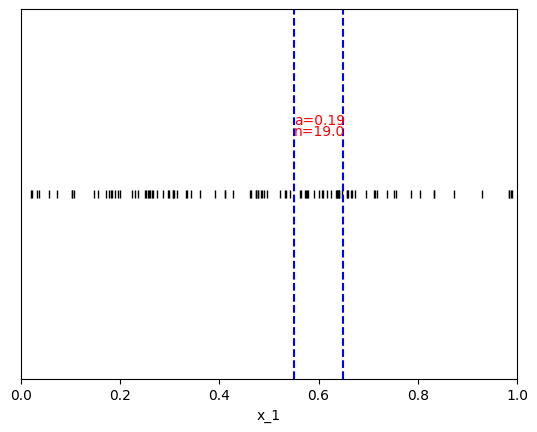

In [39]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
r = 0.1
x = np.random.uniform(low=0, high=1, size=n)
a_1_est = np.sum((x > 0.55) & (x < 0.65)) / n
n_1_est = a_1_est * n

plt.figure()
plt.plot(x, np.zeros_like(x), ' ', label="x_1")  # Creating an empty plot to set the x-axis limits
plt.xlim(0, 1)
plt.ylim(-0.1, 0.1)
plt.yticks([])  # Remove y-axis ticks
plt.xlabel("x_1")

plt.plot(x, np.zeros_like(x), '|', color='black')  # Rug plot
plt.axvline(x=0.55, linestyle='--', color='blue')
plt.axvline(x=0.65, linestyle='--', color='blue')
plt.text(0.55, 0.038, f"a={round(a_1_est, 2)}", color='red')
plt.text(0.55, 0.032, f"n={round(n_1_est, 0)}", color='red')

plt.show()

The little ticks along the x-axis are data points.  The interval between the dotted lines is the 10% interval between $x = 0.55$ an $x = 0.65$.  The text in that interval is the estimate for $a$.  Run this a few times.  You'll see that we get estimates for $a$ of around 10%, just as we reasoned above.

##### Answer to b
But what if we have two variables, $x_1$ and $x_2$.  Let's simulate first.

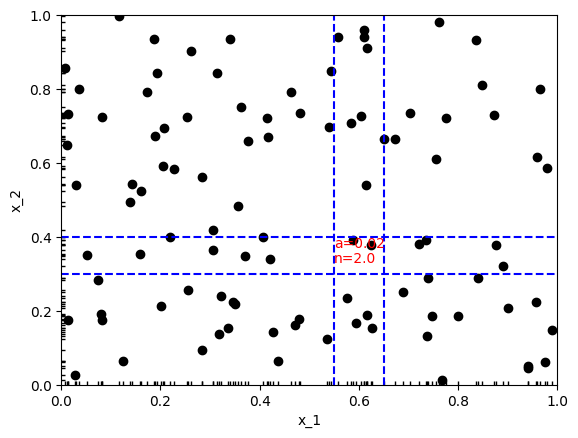

In [36]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x_1 = np.random.uniform(low=0, high=1, size=n)
x_2 = np.random.uniform(low=0, high=1, size=n)
r_1 = 0.10
r_2 = 0.10
a_2_est = np.sum(((x_1 > 0.55) & (x_1 < 0.65)) & ((x_2 > 0.3) & (x_2 < 0.4))) / n
n_2_est = a_2_est * n

plt.figure()
plt.scatter(x_1, x_2, label="x_2 vs x_1", color='black')  # Scatter plot for x_2 vs x_1
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.plot(x_1, np.zeros_like(x_1), '|', color='black')  # Rug plot for x_1
plt.plot(np.zeros_like(x_2), x_2, '_', color='black')  # Rug plot for x_2
plt.axvline(x=0.55, linestyle='--', color='blue')
plt.axhline(y=0.3, linestyle='--', color='blue')
plt.axvline(x=0.65, linestyle='--', color='blue')
plt.axhline(y=0.4, linestyle='--', color='blue')
plt.text(0.55, 0.37, f"a={round(a_2_est, 2)}", color='red')
plt.text(0.55, 0.33, f"n={round(n_2_est, 0)}", color='red')

plt.show()

Run this a few times and you'll get estimated $a$ values around 1%.  So when $p=1$, we get $a_1 = 0.10$; for $p=2$, we get $a_2 = 0.01$--which is $a_2 = 0.10 \times 0.10 = 0.10^2$.  This makes sense: with $x_1$, we get 10% of the observations; imposing a second restriction with $a_2$ and now we get 10% of the 10%.

This trend continues for an number of parameters $p$ for any proportion of data $r$:
$$a_p = r^p$$

##### Answer to c
If we extend to $p = 100$, keeping $r = 0.10$, we get $a_{100} = 0.10^{100}$, which is basically $0$.  This informs our answer to (d).

##### Answer to d
As $p$ gets large, there is an increasingly good chance that we will have few-to-no data with which to make good inferences.  The data become too sparse across the p-dimenions.

##### Answer to e
Since data becomes increasingly sparse as $p$ increases, we will need to increase the length of the sides our hypercube $l$ to capture the same $r$.

When we have $p=1$ dimensions, we can find $l$ as
$$l_p = r^p$$
such that when $r=0.10$,
$$l_1 = 0.10^1 = 0.10$$
As $p$ increases, data becomes sparse like $r^p$.  So to counteract this, we need to expand $l$ like $r^{1/p}$.  So if we look at $p=1$, $p=2$, ..., $p=100$,...
$$l_1 = r^{1/1} = 0.10^1 = 0.10$$
$$l_2 = r^{1/2} = 0.10^{1/2} = 0.32$$
$$l_3 = r^{1/3} = 0.10^{1/3} = 0.46$$
$$...$$
$$$$l_100 = r^{1/100} = 0.10^{1/100} = 0.98$$$$
Notice that as $p$ increases, $l$ must expand towards the limits of the data.

Ultimately what we're doing by expanding $l$ with $p$ is trying to capture the same amount of data; we must expand $l$ because that data is now spread over more dimensions.  Let's look at a simulation.

We'll start by capturing $a_1 = 0.10$ of the data in $p=1$ dimension. This is the same as the first simulation we ran.

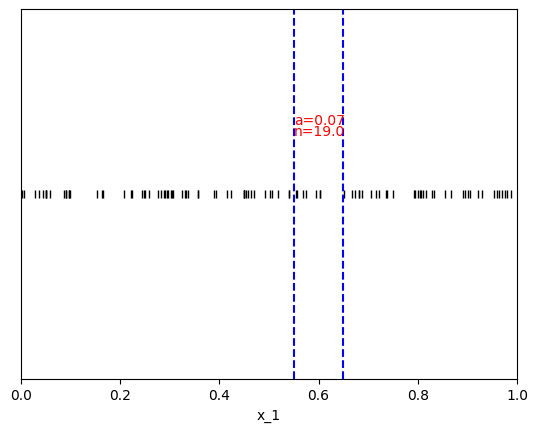

In [40]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
r = 0.1
x = np.random.uniform(low=0, high=1, size=n)
a_1_est = np.sum((x > 0.55) & (x < 0.65)) / n
n_2_est = a_1_est * n

plt.figure()
plt.plot(x, np.zeros_like(x), ' ', label="x_1")  # Creating an empty plot to set the x-axis limits
plt.xlim(0, 1)
plt.ylim(-0.1, 0.1)
plt.yticks([])  # Remove y-axis ticks
plt.xlabel("x_1")

plt.plot(x, np.zeros_like(x), '|', color='black')  # Rug plot
plt.axvline(x=0.55, linestyle='--', color='blue')
plt.axvline(x=0.65, linestyle='--', color='blue')
plt.text(0.55, 0.038, f"a={round(a_1_est, 2)}", color='red')
plt.text(0.55, 0.032, f"n={round(n_1_est, 0)}", color='red')

plt.show()

Now let's expand this to 2 dimenions.  We already saw that doing this decreases $a_p$.

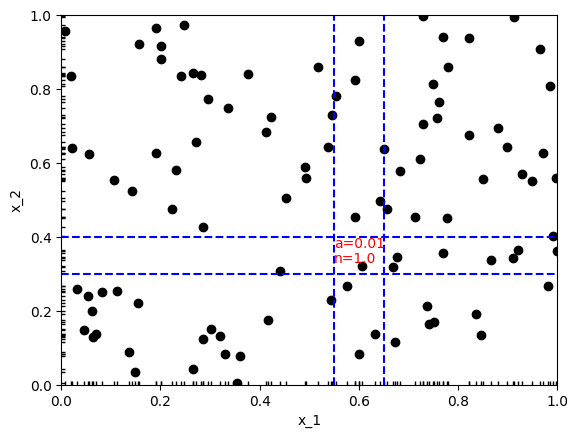

In [42]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x_1 = np.random.uniform(low=0, high=1, size=n)
x_2 = np.random.uniform(low=0, high=1, size=n)
r_1 = 0.10
r_2 = 0.10
a_2_est = np.sum(((x_1 > 0.55) & (x_1 < 0.65)) & ((x_2 > 0.3) & (x_2 < 0.4))) / n
n_2_est = a_2_est * n

plt.figure()
plt.scatter(x_1, x_2, label="x_2 vs x_1", color='black')  # Scatter plot for x_2 vs x_1
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.plot(x_1, np.zeros_like(x_1), '|', color='black')  # Rug plot for x_1
plt.plot(np.zeros_like(x_2), x_2, '_', color='black')  # Rug plot for x_2
plt.axvline(x=0.55, linestyle='--', color='blue')
plt.axhline(y=0.3, linestyle='--', color='blue')
plt.axvline(x=0.65, linestyle='--', color='blue')
plt.axhline(y=0.4, linestyle='--', color='blue')
plt.text(0.55, 0.37, f"a={round(a_2_est, 2)}", color='red')
plt.text(0.55, 0.33, f"n={round(n_2_est, 0)}", color='red')

plt.show()

Let's expand $l$ according to what we already calculated to see if we can capture the about the same amount of observations (10%).

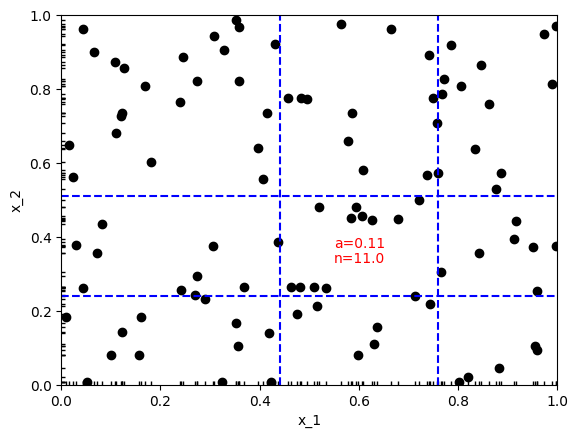

In [43]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x_1 = np.random.uniform(low=0, high=1, size=n)
x_2 = np.random.uniform(low=0, high=1, size=n)
r_1 = 0.10
r_2 = 0.10
a_2_est = np.sum(((x_1 > 0.44) & (x_1 < 0.76)) & ((x_2 > 0.24) & (x_2 < 0.51))) / n
n_2_est = a_2_est * n

plt.figure()
plt.scatter(x_1, x_2, label="x_2 vs x_1", color='black')  # Creating an empty plot to set the limits and labels
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.plot(x_1, np.zeros_like(x_1), '|', color='black')  # Rug plot for x_1
plt.plot(np.zeros_like(x_2), x_2, '_', color='black')  # Rug plot for x_2
plt.axvline(x=0.44, linestyle='--', color='blue')
plt.axhline(y=0.24, linestyle='--', color='blue')
plt.axvline(x=0.76, linestyle='--', color='blue')
plt.axhline(y=0.51, linestyle='--', color='blue')
plt.text(0.55, 0.37, f"a={round(a_2_est, 2)}", color='red')
plt.text(0.55, 0.33, f"n={round(n_2_est, 0)}", color='red')

plt.show()

But we go another way: rather than expand $l$, we could fill the same $l$ with more data.  

Say we have $n$ total observations in $p$ dimensions, of which $a_p = r^p$ are available.  This means that the total number of observations available is $na_p = nr^p$.  We also have another set of observations in $q$ dimensions such that the proportion available is $a_q = r^q$.  How many observations $m$ of the $q-dimensional$ data do wee need to get the same number of available observations as for the $p-dimensional$ data?

$$nr^p = mr^q$$
$$\rightarrow log(n) + p*log(r) = log(m) + q*log(r)$$
$$\rightarrow log(m) = log(n) + p*log(r) - q*log(r)$$
$$\rightarrow m = exp(log(m)) = exp(log(n) + p*log(r) - q*log(r))$$

So if $n=100$, $r=0.10$, $p=1$, and $q=2$, then plugging in the numbers means that we need $m=1000$ observations from the 2-dimensional data; a 10x increase. Let's simulate this.

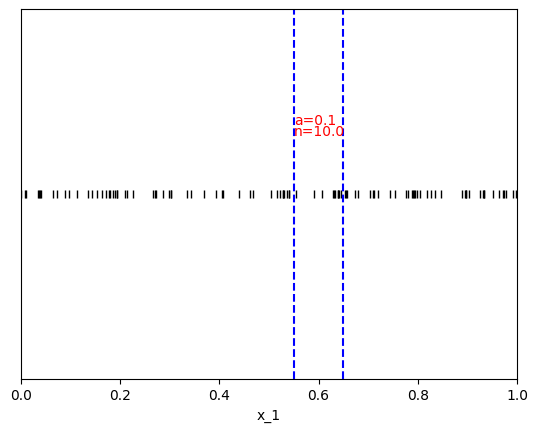

In [44]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
r = 0.1
x = np.random.uniform(low=0, high=1, size=n)
a_1_est = np.sum((x > 0.55) & (x < 0.65)) / n
n_1_est = a_1_est * n

plt.figure()
plt.plot(x, np.zeros_like(x), ' ', label="x_1")  # Creating an empty plot to set the x-axis limits
plt.xlim(0, 1)
plt.ylim(-0.1, 0.1)
plt.yticks([])  # Remove y-axis ticks
plt.xlabel("x_1")

plt.plot(x, np.zeros_like(x), '|', color='black')  # Rug plot
plt.axvline(x=0.55, linestyle='--', color='blue')
plt.axvline(x=0.65, linestyle='--', color='blue')
plt.text(0.55, 0.038, f"a={round(a_1_est, 2)}", color='red')
plt.text(0.55, 0.032, f"n={round(n_1_est, 0)}", color='red')

plt.show()

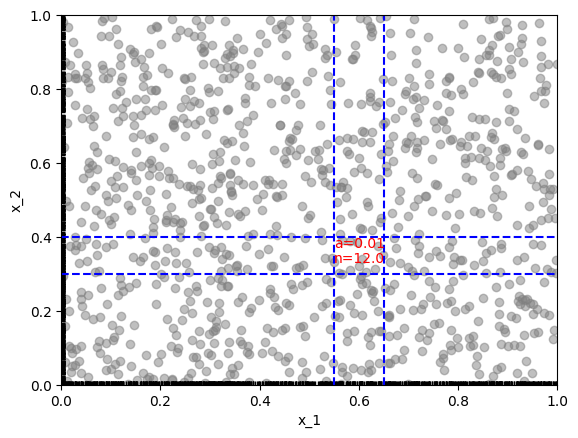

In [49]:
import numpy as np
import matplotlib.pyplot as plt

m = 1000
x_1 = np.random.uniform(low=0, high=1, size=m)
x_2 = np.random.uniform(low=0, high=1, size=m)
r_1 = 0.10
r_2 = 0.10
a_2_est = np.sum(((x_1 > 0.55) & (x_1 < 0.65)) & ((x_2 > 0.3) & (x_2 < 0.4))) / m
n_2_est = a_2_est * m

plt.figure()
plt.scatter(x_1, x_2, color='grey', label="x_2 vs x_1", alpha=0.5)  # Scatter plot for x_2 vs x_1
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.plot(x_1, np.zeros_like(x_1), '|', color='black')  # Rug plot for x_1
plt.plot(np.zeros_like(x_2), x_2, '_', color='black')  # Rug plot for x_2
plt.axvline(x=0.55, linestyle='--', color='blue')
plt.axhline(y=0.3, linestyle='--', color='blue')
plt.axvline(x=0.65, linestyle='--', color='blue')
plt.axhline(y=0.4, linestyle='--', color='blue')
plt.text(0.55, 0.37, f"a={round(a_2_est, 2)}", color='red')
plt.text(0.55, 0.33, f"n={round(n_2_est, 0)}", color='red')

plt.show()